# In case of Google colab

In [ ]:
!pip install tensorflow==1.15

# Tensorflow, Keras

credit to [CS294-112 Fall 2018](http://rail.eecs.berkeley.edu/deeprlcourse/) Tensorflow Tutorial

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

### Czym jest Graf w Tensorflow?

*rysowanko*

In [4]:
sess = tf_reset()

a = tf.constant(3, dtype=tf.float32, name='a')
b = tf.constant(2.0, name='b')

c = tf.add(a, b, name='c')

c_run = sess.run(c)

print(c_run)
print(a)
print(b)

5.0
Tensor("a:0", shape=(), dtype=float32)
Tensor("b:0", shape=(), dtype=float32)


In [5]:
tf.get_default_graph().get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Add>]

In [6]:
sess = tf_reset()

a = tf.constant([[-1.], [-2.], [-3.]], dtype=tf.float32, name='a')
b = tf.constant([[1., 2., 3.]], dtype=tf.float32, name='b')

a_np = np.array([[-1.], [-2.], [-3.]])
b_np = np.array([[1., 2., 3.]])

a_run, b_run = sess.run([a, b])
print(a_run)
print(b_run)

[[-1.]
 [-2.]
 [-3.]]
[[1. 2. 3.]]


In [7]:
tf.get_default_graph().get_operations()

[<tf.Operation 'a' type=Const>, <tf.Operation 'b' type=Const>]

### Broadcasting

In [8]:
c = b + b
d = a + b

c_run, d_run = sess.run([c, d])
print(c_run, '\n')
print(d_run)

[[2. 4. 6.]] 

[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]


In [9]:
print(b_np + b_np, '\n')
print(a_np + b_np)

[[2. 4. 6.]] 

[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]


In [10]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])

print(c_elementwise_run, '\n')
print(c_matmul_run)

[[-1. -2. -3.]
 [-2. -4. -6.]
 [-3. -6. -9.]] 

[[-14.]]


### Input

In [11]:
sess = tf_reset()

# inputs
a = tf.placeholder(dtype=tf.float32, shape=[None,], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None,], name='b_placeholder')

# do some operations
c = a + b

# get outputs
c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [1.0, 2.0], b: [2.0, 4.0]})

print(a)
print(b)
print(c0_run)
print(c1_run)

Tensor("a_placeholder:0", shape=(?,), dtype=float32)
Tensor("b_placeholder:0", shape=(?,), dtype=float32)
[3.]
[3. 6.]


### Variables

In [12]:
sess = tf_reset()

b = tf.constant([[1., 2., 3.]], dtype=tf.float32, name='b')

var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name='myvar',
                      shape=[1, 3],
                      dtype=tf.float32,
                      initializer=tf.constant_initializer(var_init_value))

print(var)
c = b + var

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [13]:
c_run = sess.run(c)

FailedPreconditionError: Attempting to use uninitialized value myvar
	 [[node myvar/read (defined at /usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'myvar/read':
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-d39a96104912>", line 9, in <module>
    initializer=tf.constant_initializer(var_init_value))
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 1500, in get_variable
    aggregation=aggregation)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 1243, in get_variable
    aggregation=aggregation)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 567, in get_variable
    aggregation=aggregation)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 519, in _true_getter
    aggregation=aggregation)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 933, in _get_single_variable
    aggregation=aggregation)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 2519, in default_variable_creator
    shape=shape)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 1688, in __init__
    shape=shape)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 1872, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py", line 203, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_array_ops.py", line 4239, in identity
    "Identity", input=input, name=name)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [14]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [15]:
c_run = sess.run(c)
print(c_run)

[[3. 6. 9.]]


![Image of Yaktocat](https://i.imgflip.com/372ihb.png)

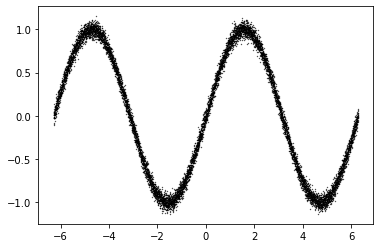

In [16]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [17]:
sess = tf_reset()

def create_model():
    input_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    output = input_placeholder
    
    n_layers = 2
    size = 20
    output_size = 1
    activation = tf.nn.relu
    output_activation = None
    
    with tf.variable_scope('mlp'):
        for _ in range(n_layers):
            output = tf.layers.dense(output, size, activation=activation)
        output = tf.layers.dense(output, output_size, activation=output_activation)
    
    return input_placeholder, output_placeholder, output

input_placeholder, output_placeholder, output = create_model()

# loss 
mse = tf.reduce_mean(0.5 * tf.square(output - output_placeholder))

# optimizer
optimizer = tf.train.AdamOptimizer()
opt = optimizer.minimize(mse)

sess.run(tf.global_variables_initializer())
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_placeholder: input_batch, output_placeholder: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print(f'step: {training_step} mse: {mse_run}')
saver = tf.train.Saver()
saver.save(sess, 'model.ckpt')

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
step: 0 mse: 0.48711246252059937
step: 1000 mse: 0.02339904010295868
step: 2000 mse: 0.018161797896027565
step: 3000 mse: 0.016437631100416183
step: 4000 mse: 0.004962928593158722
step: 5000 mse: 0.0021082160528749228
step: 6000 mse: 0.0019234304782003164
step: 7000 mse: 0.0014593407977372408
step: 8000 mse: 0.0016732250805944204
step: 9000 mse: 0.001204037107527256


'model.ckpt'

INFO:tensorflow:Restoring parameters from model.ckpt


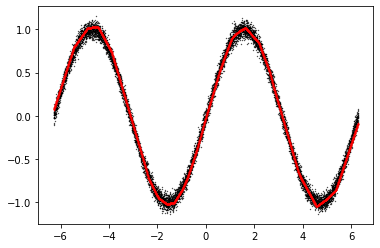

In [18]:
sess = tf_reset()

# create the model
input_placeholder, output_placeholder, output = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, "model.ckpt")

output_pred_run = sess.run(output, feed_dict={input_placeholder: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)

### Keras

In [21]:
import tensorflow.keras as keras

##### Previous example, but in keras

In [22]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(inputs, outputs, epochs=20, batch_size=32)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 0s 33us/sample - loss: 0.3018
Epoch 2/20
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1064
Epoch 3/20
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0763
Epoch 4/20
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0651
Epoch 5/20
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0571
Epoch 6/20
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0495
Epoch 7/20
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0427
Epoch 8/20
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0366
Epoch 9/20
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0314
Epoch 10/20
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0261
Epoch 11/20
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0218
Epoch 1

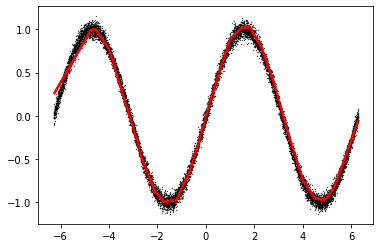

In [25]:
plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], model.predict(inputs)[:, 0], c='r', marker='o', s=0.1)

### Complex model

In [32]:
labmda = 1e-4
initializer = keras.initializers.VarianceScaling(scale=2.0)
# architektura wygląda w nastempujący sposób:
# [ [Conv(3x3) -> BatchNorm]x2 -> MaxPool -> Dropout ]x3 -> Dense -> scores
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda), input_shape=(32,32,3) ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2), (2,2)),
    keras.layers.Dropout(rate=0.3),
    
    keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    keras.layers.BatchNormalization(),
    #keras.layers.MaxPooling2D((2,2), (2,2)),
    keras.layers.Dropout(rate=0.3),
    
    #keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    #keras.layers.BatchNormalization(),
    #keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='valid', activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    #keras.layers.BatchNormalization(),
    #keras.layers.MaxPooling2D((2,2), (2,2)),
    #keras.layers.Dropout(rate=0.3),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(10, kernel_initializer=initializer, activation='softmax')
])

model.compile(keras.optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)       

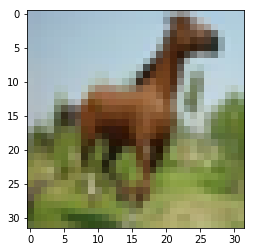

In [48]:
(X_cifar_train, y_cifar_train), (X_cifar_test, y_cifar_test) = tf.keras.datasets.cifar10.load_data()

plt.imshow(X_cifar_train[256])

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(X_cifar_train)

In [50]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
  lr = 1e-3
  if(epoch >= 70):
    lr = 5e-4
  if(epoch >= 85):
    lr = 2e-4
  if(epoch >= 100):
    lr = 1e-5
  if(epoch >= 115):
    lr = 5e-6
  return lr

model.fit_generator(datagen.flow(X_cifar_train, y_cifar_train, batch_size=64),
                    steps_per_epoch = X_cifar_train.shape[0]//64, 
                    epochs=1,
                    verbose=1, 
                    validation_data=datagen.flow(X_cifar_test, y_cifar_test, batch_size=64), 
                    shuffle=True, 
                    callbacks=[LearningRateScheduler(lr_schedule, verbose=1)])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
 59/781 [=>............................] - ETA: 2:17 - loss: 3.1326 - acc: 0.1776

KeyboardInterrupt: 

### Define own parts of model

In [55]:
# [Conv(3x3) -> BatchNorm]x2 -> MaxPool -> Dropout]
class ModelUnit(keras.Model):
    def __init__(self, kernel_num, kernel_size, dropout_rate, pool_size, input_shape=None, **kwargs):
        super(ModelUnit, self).__init__(name='ConvBatchNormx2PoolDropout')
        
        if input_shape:
            self.conv1 = keras.layers.Conv2D(kernel_num, kernel_size, input_shape=input_shape, **kwargs)
        else:
            self.conv1 = keras.layers.Conv2D(kernel_num, kernel_size, **kwargs)
        self.norm1 = keras.layers.BatchNormalization()
        self.conv2 = keras.layers.Conv2D(kernel_num, kernel_size, **kwargs)
        self.norm2 = keras.layers.BatchNormalization()
        self.pool = keras.layers.MaxPooling2D(pool_size, pool_size)
        self.dropout = keras.layers.Dropout(rate=dropout_rate)
    
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.norm1(x)
        x = self.conv2(x)
        x = self.norm2(x)
        x = self.pool(x)
        x = self.dropout(x)
        return x

In [56]:
labmda = 1e-4
initializer = keras.initializers.VarianceScaling(scale=2.0)

model = keras.Sequential([
    ModelUnit(32, (3, 3), 0.3, (2, 2), input_shape=(32,32,3), strides=(1,1), padding='same', activation='relu',
              kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    
    ModelUnit(64, (3, 3), 0.3, (2, 2), strides=(1,1), padding='same', activation='relu',
              kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    
    ModelUnit(128, (3, 3), 0.3, (2, 2), strides=(1,1), padding='same', activation='relu',
              kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(labmda)),
    keras.layers.Flatten(),
    
    keras.layers.Dense(10, kernel_initializer=initializer, activation='softmax')
])

model.compile(keras.optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(X_cifar_train)

In [58]:
def lr_schedule(epoch, lr):
  lr = 1e-3
  if(epoch >= 70):
    lr = 5e-4
  if(epoch >= 85):
    lr = 2e-4
  if(epoch >= 100):
    lr = 1e-5
  if(epoch >= 115):
    lr = 5e-6
  return lr

model.fit_generator(datagen.flow(X_cifar_train, y_cifar_train, batch_size=64),
                    steps_per_epoch = X_cifar_train.shape[0]//64, 
                    epochs=1,
                    verbose=1, 
                    validation_data=datagen.flow(X_cifar_test, y_cifar_test, batch_size=64), 
                    shuffle=True, 
                    callbacks=[LearningRateScheduler(lr_schedule, verbose=1)])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
 95/781 [==>...........................] - ETA: 2:12 - loss: 2.9046 - acc: 0.1923

KeyboardInterrupt: 

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvBatchNormx2MaxPoolDropou multiple                  10400     
_________________________________________________________________
ConvBatchNormx2MaxPoolDropou multiple                  55936     
_________________________________________________________________
ConvBatchNormx2MaxPoolDropou multiple                  222464    
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  1290      
Total params: 290,090
Trainable params: 289,194
Non-trainable params: 896
_________________________________________________________________
